<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning/blob/main/Neural_network_using_Sequential_Api_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential # 'Sequential API
from tensorflow.keras.layers import Dense #connects every neuron of the preceding layer to every neuron of current layer. It is also known as Fully connected layer.

from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

## mnist is a widely-used collection of handwritten digits designed for training and testing image classification systems. It includes 60,000 training images and 10,000 testing images, all of which are grayscale and 28×28 pixels in size.

# Load The dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


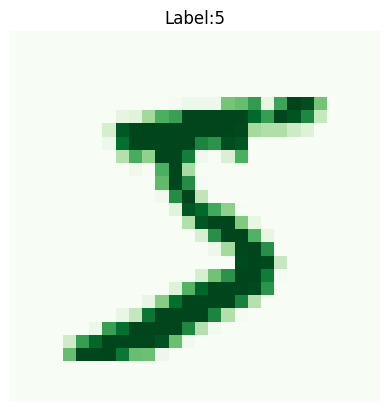

In [3]:
plt.imshow(x_train[0],cmap='Greens')
plt.title(f"Label:{y_train[0]}")
plt.axis('off')
plt.show()

# To display many numbers of image

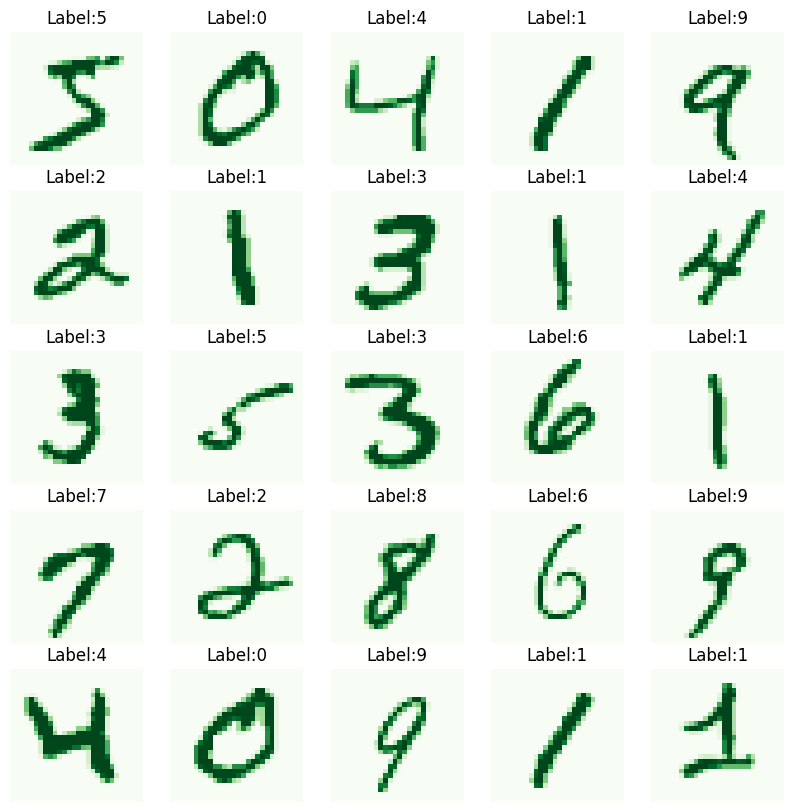

In [4]:
plt.figure(figsize=(10,10)) #figure size to 10x10 inches

for i in range(25):
  plt.subplot(5,5,i+1) # 5 rows and 5 columns
  plt.imshow(x_train[i],cmap='Greens')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.show()


# Normalization and reshaping


In [5]:
x_train=x_train.reshape(-1,28*28)/255.0
x_test=x_test.reshape(-1,28*28)/255.0

#  flattening each 28×28 image into a 1D vector of 784 features — suitable for fully connected (dense) networks.
# Normalizes the pixel values from the range [0, 255] → [0, 1].

# This helps the neural network train faster and more effectively because smaller values reduce vanishing gradients and make optimization more stable.

 # Define the neural network architecturde


In [6]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(28*28,)), #input layer
    Dense(64,activation='relu'), #hidden layer
    Dense(32,activation='relu'), # hidden layer
    Dense(10,activation='softmax') # ouput layer,,for multicklass classification ,,use softmax

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

## 🧠 Loss Functions Summary Table

| Problem Type             | Output Layer           | Loss Function                     |
|--------------------------|------------------------|------------------------------------|
| Binary Classification    | Sigmoid (1 neuron)     | `BinaryCrossentropy`              |
| Multi-Class (One-hot)    | Softmax (n neurons)    | `CategoricalCrossentropy`         |
| Multi-Class (Labels)     | Softmax (n neurons)    | `SparseCategoricalCrossentropy`   |
| Multi-Label Classification | Sigmoid (n neurons)  | `BinaryCrossentropy`              |
| Regression               | Linear (1 or more)     | `MSE`, `MAE`, `Huber`             |

## Optimizer SUMMARY TABLE
## 🚀 Optimizers for Different Deep Learning Tasks

| Problem Type                     | Recommended Optimizer         | Notes                                           |
|----------------------------------|-------------------------------|-------------------------------------------------|
| Binary Classification            | `Adam`, `SGD (with momentum)` | Adam is usually faster                         |
| Multi-Class Classification       | `Adam`, `RMSprop`             | Good convergence for most image tasks          |
| Multi-Label Classification       | `Adam`, `Nadam`               | Adam handles multiple sigmoids well            |
| Regression                       | `Adam`, `SGD`                 | Depends on the problem complexity              |
| CNNs (e.g., image data)          | `Adam`, `RMSprop`             | Fast & stable learning                         |
| RNNs / LSTMs                     | `RMSprop`, `Adam`             | RMSprop works well with sequential data        |
| Transformers / BERT              | `AdamW`                       | Optimized for weight decay and generalization  |
| Sparse Data (e.g., NLP TF-IDF)   | `Adagrad`                     | Handles rare features well                     |


In [7]:
# cOMPILE THE MODEL
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train the model

### epochs=10 ,,The model will go through the entire training dataset 10 times.

###  x_train has 60,000 samples:

validation_split=0.25 means:

4,5000 samples used for training.

1,5000 samples used for validation.

batch_size-32.... 45000/32=1407 samples will iterate per epoch

In [8]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8313 - loss: 0.5310 - val_accuracy: 0.9508 - val_loss: 0.1707
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9615 - loss: 0.1272 - val_accuracy: 0.9665 - val_loss: 0.1184
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9755 - loss: 0.0806 - val_accuracy: 0.9679 - val_loss: 0.1109
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9811 - loss: 0.0600 - val_accuracy: 0.9669 - val_loss: 0.1147
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9841 - loss: 0.0497 - val_accuracy: 0.9718 - val_loss: 0.1011
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 0.9695 - val_loss: 0.1189
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9738 - val_loss: 0.0987
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0259

## 📦 Batch Size

- **Definition**: Number of training samples processed before the model updates weights.

### ✅ Common Batch Sizes

| Batch Size | Use Case                                      |
|------------|-----------------------------------------------|
| 16 or 32   | Good for most problems (default)              |
| 64 or 128  | Faster training if GPU allows                 |
| 256+       | Used in large-scale training or fine-tuning   |
| 1          | Online learning (very slow)                   |

---

## 🔁 Epochs

- **Definition**: One full pass through the entire training dataset.

### ✅ Recommended Epochs

| Epochs     | Use Case                                   |
|------------|--------------------------------------------|
| 10–50      | Small models, quick testing                |
| 50–200     | Medium to large models                     |
| 100+       | Depends on dataset and early stopping      |

> 🛑 Use **EarlyStopping** callback to avoid overfitting.


## Evaluate the model performance

In [9]:
test_loss,test_accuracy=model.evaluate(x_train,y_train)
print(f"Test Loss:{test_loss}")
print(f"Test Accuracy:{test_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9936 - loss: 0.0211
Test Loss:0.04479479417204857
Test Accuracy:0.9887999892234802


# Prediction on the test set

In [10]:
y_pred=model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.00076898e-08, 1.93139993e-08, 1.32647443e-07, ...,
        9.99775171e-01, 8.60950067e-08, 1.68388244e-04],
       [5.72170306e-12, 1.46414664e-06, 9.99998510e-01, ...,
        5.10643403e-11, 5.16085841e-10, 6.59967705e-11],
       [3.14414486e-08, 9.99689102e-01, 6.37816993e-06, ...,
        1.52770546e-04, 1.03672617e-04, 5.68150789e-08],
       ...,
       [6.39347139e-16, 3.48094519e-13, 2.75151114e-14, ...,
        1.13775336e-10, 4.13813561e-09, 2.37722091e-08],
       [7.97158659e-11, 3.93815362e-11, 1.52271240e-12, ...,
        3.81035264e-12, 4.80586205e-05, 1.27657685e-11],
       [2.60791974e-12, 1.80882650e-22, 3.11186670e-16, ...,
        6.93868925e-26, 1.32777539e-14, 8.03217449e-20]], dtype=float32)

| Use                | Purpose                                   |
|--------------------|--------------------------------------------|
| `np.argmax`        | Finds the index of the largest value       |
| In classification  | Converts probability → predicted label     |
| Needed for         | Accuracy, confusion matrix, etc.           |


In [11]:
y_pred_clasees=np.argmax(y_pred,axis=1)
y_pred_clasees

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
cm=confusion_matrix(y_test,y_pred_clasees)
cm

array([[ 968,    0,    0,    0,    1,    3,    2,    1,    3,    2],
       [   0, 1129,    2,    1,    0,    0,    1,    0,    2,    0],
       [   2,    1, 1003,    3,    2,    0,    0,    4,   15,    2],
       [   0,    0,    4,  963,    0,   12,    0,    3,    9,   19],
       [   1,    0,    2,    1,  959,    0,    6,    3,    2,    8],
       [   2,    0,    0,    3,    1,  869,    6,    1,    7,    3],
       [   5,    3,    0,    1,    2,    4,  938,    0,    5,    0],
       [   1,    2,    5,    0,    2,    0,    0, 1006,    3,    9],
       [   4,    0,    2,    3,    2,    1,    0,    4,  951,    7],
       [   3,    2,    0,    1,    9,    3,    0,    1,    3,  987]])

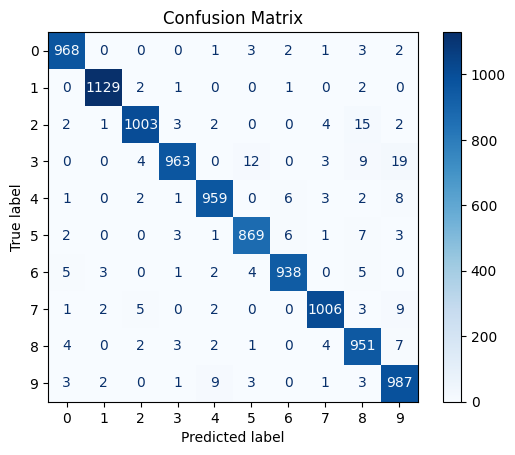

In [17]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()